In [0]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
Nlist=[5, 1000, 3000]
T=10
timeDiffNP=np.zeros((T,len(Nlist)), dtype=np.float32)
timeDiffTF=np.zeros((T,len(Nlist)), dtype=np.float32)

sess=tf.Session()

for N in range(len(Nlist)):
  A=np.random.rand(Nlist[N],Nlist[N])
  Atf=tf.constant(A)
  Btf=Atf@Atf@Atf@Atf@Atf
  for i in range(T):
    ticNP=time.time()
    B=A@A@A@A@A
    tocNP=time.time()
    
    ticTF=time.time()
    sess.run(Btf)
    tocTF=time.time()
    
    timeDiffNP[i,N]=tocNP-ticNP
    timeDiffTF[i,N]=tocTF-ticTF
    
  print('CPU (numpy): {0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffNP[N,:])))
  print('GPU (TF): {0}X{0}: {1:f}'.format(Nlist[N], np.mean(timeDiffTF[N,:])))
sess.close()  

CPU (numpy): 5X5: 0.000022
GPU (TF): 5X5: 0.003249
CPU (numpy): 1000X1000: 0.057272
GPU (TF): 1000X1000: 0.000872
CPU (numpy): 3000X3000: 2.684441
GPU (TF): 3000X3000: 0.077870


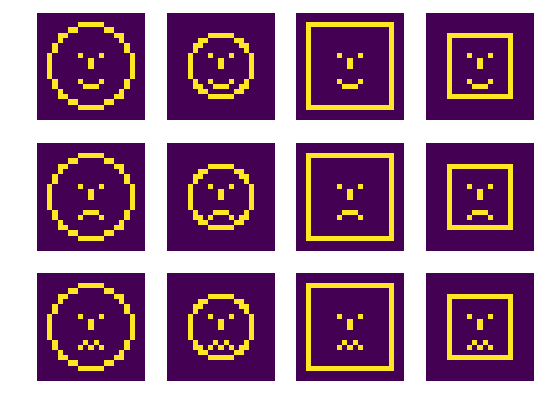

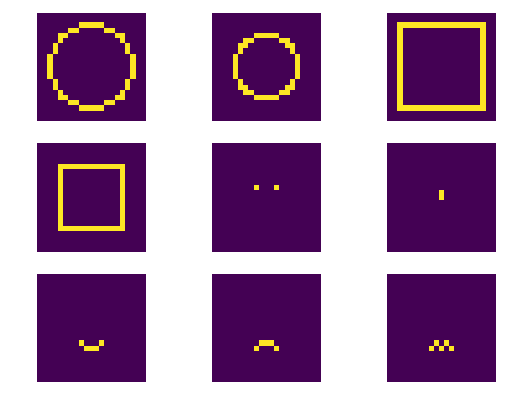

In [3]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w9=np.zeros((21,21))
w9[[14,13,14,13,14], [8,9,10,11,12]]=1;



# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((12,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X[8,:]=(w1+w5+w6+w9).reshape((1,21*21))
X[9,:]=(w2+w5+w6+w9).reshape((1,21*21))
X[10,:]=(w3+w5+w6+w9).reshape((1,21*21))
X[11,:]=(w4+w5+w6+w9).reshape((1,21*21))
X=X.T


W=np.zeros((9,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W[8,:]=w9.reshape((1,21*21))
W=W.T

# 
# %matplotlib inline
plt.figure()
for i in range(3):
  for j in range(4):
    ax=plt.subplot2grid((3, 4), (i, j))
    ax.imshow(X[:,i*4+j].reshape((21,21)))
    plt.axis('off')

plt.figure()
for i in range(3):
  for j in range(3):
    ax=plt.subplot2grid((3, 3), (i, j))
    ax.imshow(W[:,i*3+j].reshape((21,21)))
    plt.axis('off')



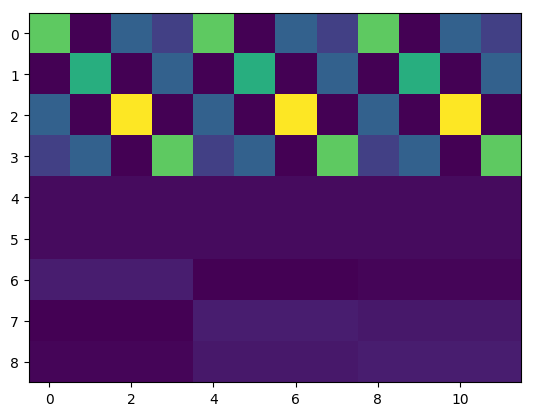

In [4]:
H=W.T@X
plt.figure()
plt.imshow(H)

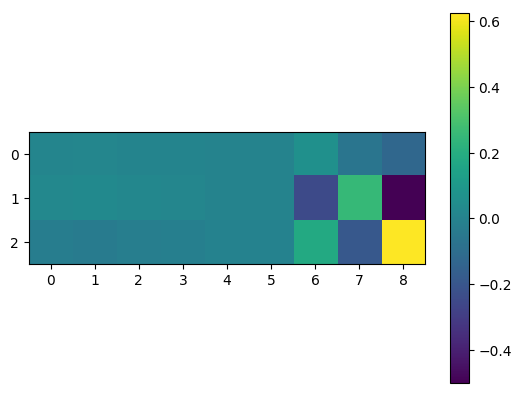

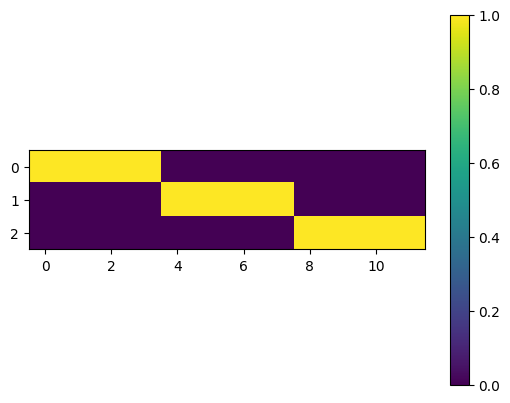

In [5]:
y=np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]])
W2=np.linalg.pinv(H@H.T)@H@y.T
plt.figure()
plt.imshow(W2.T)
plt.colorbar()

yh=W2.T@H
plt.figure()
plt.imshow(yh)
plt.colorbar()

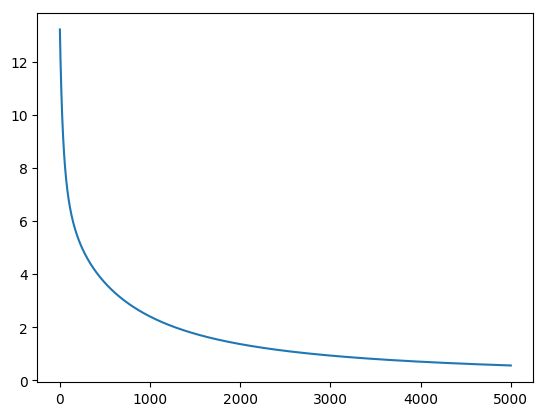

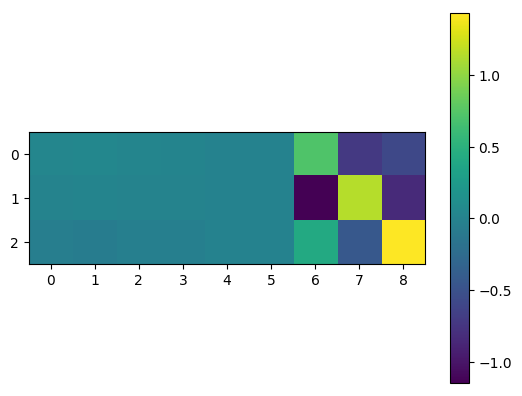

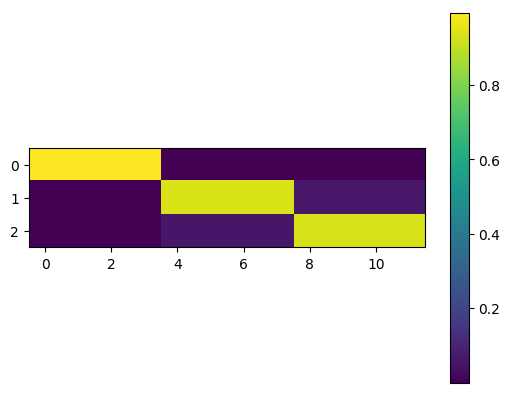

In [6]:
y=np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]])
W2=(np.random.rand(3,9)-0.5)*.01
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis=0, keepdims=True)
N=5000
err=np.zeros(N)
lr=0.0003
for i in range(N):
  z=W2@H
  yh=softmax(z)
  err[i]=np.sum(-y*np.log(yh))
  dW2=-(yh-y)@H.T
  W2+=dW2*lr

plt.figure()
plt.plot(err)
plt.show()    

plt.figure()
plt.imshow(W2)
plt.colorbar()

plt.figure()
plt.imshow(yh)
plt.colorbar()



In [8]:
# https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab

LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-01-14 15:28:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.226.180.131, 34.206.130.40, 34.204.22.7, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.226.180.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]   5.11M  3.07MB/s    in 1.7s    

2019-01-14 15:28:58 (3.07 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
http://d1b3054d.ngrok.io


In [0]:
sess = tf.InteractiveSession()
with tf.name_scope('lastlayer'):
  lr=tf.constant(0.0003, dtype=tf.float32, name='learningRate')
  Y=tf.constant(np.array([[1,1,1,1,0,0,0,0,0,0,0,0], [0,0,0,0,1,1,1,1,0,0,0,0], [0,0,0,0,0,0,0,0,1,1,1,1]]),
                  dtype=tf.float32, name='target')
  H=tf.constant(W.T@X, dtype=tf.float32, name='input')
  W2=tf.Variable((tf.random_uniform((3,9))-.5)*.001, name='weights')
  with tf.name_scope('output'):
    Yh=W2@H
    err=tf.reduce_sum(-Y*tf.log(tf.exp(Yh)/tf.reduce_sum(tf.exp(Yh), 0, True)))
  dW2=tf.gradients(err, W2)
  update=tf.assign(W2, W2-lr*dW2[0])

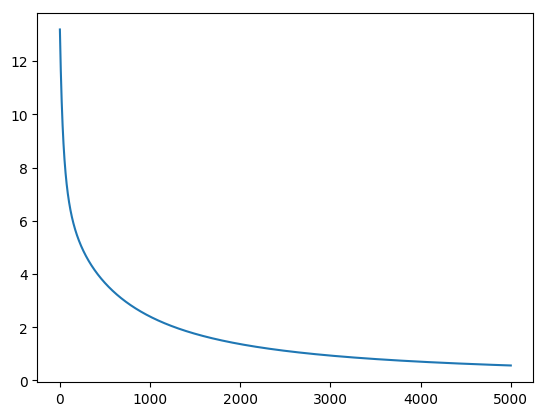

In [10]:
tf.global_variables_initializer().run()
train_writer = tf.summary.FileWriter(LOG_DIR, sess.graph)
maxIter=5000
errt=np.zeros(maxIter, dtype=np.float32)
for i in range(maxIter):
  errt[i], _=sess.run([err, update])
  
plt.figure()
plt.plot(errt)
plt.show()
sess.close()